In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings("ignore")

In [18]:
df=pd.read_csv(r"D:\data science\mlprojects\notebook\data\StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [19]:
X=df.drop("math score", axis=1)
y=df["math score"]

In [20]:
cat_cols = X.select_dtypes(include="object").columns
num_cols= X.select_dtypes(exclude="object").columns

In [21]:
num_cols

Index(['reading score', 'writing score'], dtype='object')

In [22]:
#train-test split
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.8,random_state=42)

In [23]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numerical_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("OHC",oh_transformer,cat_cols),
        ("SS",numerical_transformer,num_cols)
    ]
)

In [24]:
X_train=preprocessor.fit_transform(X_train)
X_val= preprocessor.transform(X_val)

In [25]:
X_train.shape


(800, 19)

In [26]:
# Model Evaluation
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [27]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "LightGBM Regressor": LGBMRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [28]:
model_list =[]
r2_list=[]
rmse_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    # Predict
    y_val_pred = model.predict(X_val)
    # Model Metrics
    model_test_mae , model_test_rmse, model_test_r2= evaluate_model(y_val,y_val_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance on Validation set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    rmse_list.append(model_test_rmse)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance on Validation set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance on Validation set
- Root Mean Squared Error: 6.5173
- Mean Absolute Error: 5.1557
- R2 Score: 0.8254


Ridge
Model performance on Validation set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance on Validation set
- Root Mean Squared Error: 7.2172
- Mean Absolute Error: 5.5880
- R2 Score: 0.7859


Decision Tree
Model performance on Validation set
- Root Mean Squared Error: 8.2335
- Mean Absolute Error: 6.5100
- R2 Score: 0.7214


Random Forest Regressor
Model performance on Validation set
- Root Mean Squared Error: 6.0402
- Mean Absolute Error: 4.6173
- R2 Score: 0.8501


XGBRegressor
Model performance on Validation set
- Root Mean Squared Error: 6.4733
- Mean Absolute Error: 5.0577
- R2 Score: 0.8278


[LightGBM] [Info] Auto-choosing row-wise multi-thr

In [29]:
pd.DataFrame(list(zip(model_list, r2_list,rmse_list)), columns=['Model Name', 'R2_Score','Root Mean Squared Error']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score,Root Mean Squared Error
2,Ridge,0.880592,5.390418
0,Linear Regression,0.880433,5.393994
5,Random Forest Regressor,0.850071,6.040152
8,AdaBoost Regressor,0.846660,6.108472
7,LightGBM Regressor,0.841107,6.218097
6,XGBRegressor,0.827797,6.473307
1,Lasso,0.825446,6.517347
3,K-Neighbors Regressor,0.785944,7.217202
4,Decision Tree,0.721417,8.233468


In [30]:
lr_model =LinearRegression()
lr_model.fit(X_train,y_train)


LinearRegression()

In [31]:
y_pred=lr_model.predict(X_val)
lr_score_r2= r2_score(y_val,y_val_pred)
lr_score_rmse = np.sqrt(mean_squared_error(y_val,y_pred))

In [32]:
lr_score_rmse

np.float64(5.393993869732847)

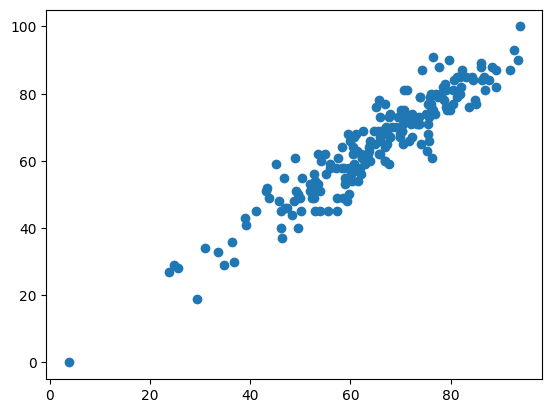

In [33]:
plt.scatter(y_pred,y_val)

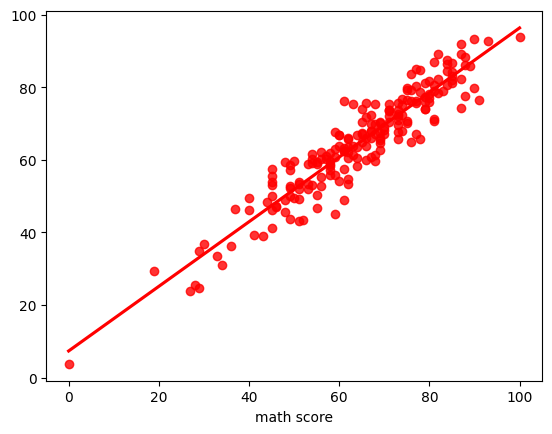

In [34]:
sns.regplot(x=y_val,y=y_pred,ci=None,color ='red');

In [35]:
pred_df=pd.DataFrame({'Actual Value':y_val,'Predicted Value':y_pred,'Difference':y_val-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
